# Plotting Discrepancies for Kinetic Temperature

In [1]:
import numpy as np
import scipy.stats as sts
from scipy import constants as cnst
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
#fname = r"h:/appstateBulk/workAppstateBulk/postProcessing/20251025prjUncertPlotUncertainty/inputs/20251002aa_computeDiscrep04_forpap_100_500fps_corr/ptv_results.csv"

In [3]:
#fname = r"d:/kananovich/workAppstateBulk/postProcessing/20251015prjUncertPlotUncertainty/inputs/20251002aa_computeDiscrep04_forpap_100_500fps_corr/ptv_results.csv"

In [4]:
#fname = r"e:/appstateBulk/workAppstateBulk/HPCbackupHomeRsync/new/workHPC/prj_uncert_hpc/sims/ptv_results.csv"

In [5]:
fname = "ptv_results.csv"

In [6]:
#fname = "ptv_results10eV.csv"

In [13]:
arr_resol = np.arange(1E-6,40E-6,1.6E-7)
arr_framerate = np.arange(30.0, 500.0, 8.0)
arr_discrep_average = np.zeros((len(arr_resol), len(arr_framerate)))
number_of_averaging_iterations = 40
levels_f_contour = np.array([0,10,20,40,80,100,200,500,1000,1500,2000,3000,10000,40000])
#levels_f_contour = np.array([0,3,5,10,20,30,40,50,100, 200,400])
max_lev = np.max(levels_f_contour)

In [14]:
df = pd.read_csv(fname, index_col=0)

In [15]:
df.tail()

,3.000000000e+01,4.000000000e+01,5.000000000e+01,6.000000000e+01,7.000000000e+01,8.000000000e+01,9.000000000e+01,1.000000000e+02,1.100000000e+02,1.200000000e+02,...,4.100000000e+02,4.200000000e+02,4.300000000e+02,4.400000000e+02,4.500000000e+02,4.600000000e+02,4.700000000e+02,4.800000000e+02,4.900000000e+02,5.000000000e+02
resolution,,,,,,,,,,,,,,,,,,,,,
0.00004,1.419578,2.697277,4.342539,6.350856,8.719973,11.461534,14.558541,18.034575,21.869506,26.063506,...,306.794075,321.789220,337.204256,353.299458,369.384794,386.040057,403.022136,420.280839,438.129111,456.388653
0.00004,1.427828,2.712116,4.364212,6.375878,8.766703,11.515353,14.641208,18.125080,21.977995,26.187389,...,308.176771,323.382778,339.006060,355.128923,371.219933,387.812474,405.251370,422.683494,440.414769,458.219942
0.00004,1.436179,2.727464,4.386027,6.413287,8.815843,11.569896,14.709266,18.209079,22.086925,26.342314,...,309.753372,325.090989,340.745861,356.400528,373.047095,389.658581,407.011933,424.202040,442.610968,460.804726
0.00004,1.444636,2.741843,4.405200,6.448035,8.858940,11.639340,14.789050,18.311217,22.183677,26.455566,...,311.261567,326.652634,342.374335,358.736119,375.092567,391.897635,409.266564,426.456090,444.828975,462.959407
0.00004,1.452219,2.757420,4.433720,6.483802,8.896507,11.687713,14.863628,18.400514,22.319023,26.586413,...,312.925484,328.492961,344.097463,360.483858,377.125530,393.940601,411.157188,428.932922,447.103039,465.138137


In [16]:
frame_rates = df.columns.astype(float).to_numpy()
resolutions = df.index.to_numpy()
Z = df.to_numpy()
Z = Z * 100

<a list of 12 text.Text objects>

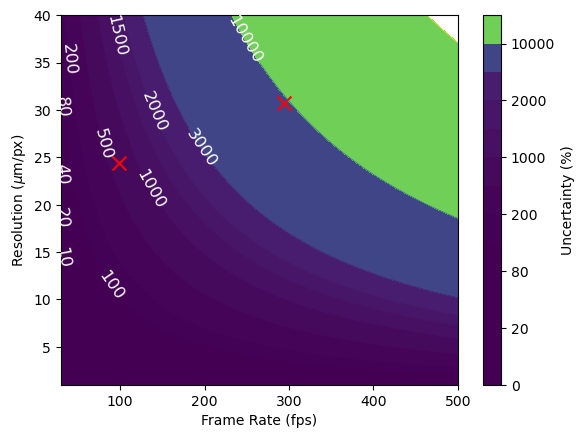

In [17]:
Xf, Yf = np.meshgrid(frame_rates, resolutions * 1000000)


# In[40]:


# Assuming X, Y, arr_discrep_average are already defined
fig5, ax5 = plt.subplots()

# Filled contours
khuj5 = ax5.contourf(Xf, Yf, Z, levels= levels_f_contour, norm=colors.Normalize(vmin=0, vmax=max_lev*0.8))

# Add colorbar with customized ticks
cbar5 = plt.colorbar(khuj5, ax=ax5, label='Uncertainty (%)')

# Axis labels
ax5.set_ylabel(r"Resolution ($\mu$m/px)")
ax5.set_xlabel(r"Frame Rate (fps)")

# Experimental points
ax5.scatter([99, 294], [24.39, 30.69], marker='x', color='red', label='Experimental points', s=100)

# Set colorbar limits to enforce end at 400
#cbar.ax.set_ylim(0, 400)

line_contours5 = ax5.contour(Xf, Yf, Z, levels=khuj5.levels, linewidths=0.5,norm=colors.Normalize(vmin=0, vmax=(max_lev*0.8)))

for txt in ax5.texts:
    txt.set_clip_on(True)

ax5.clabel(
    line_contours5,
    # khuj,
    fmt='%1.0f',
    fontsize=12,
    colors='white',
    inline=True,
    inline_spacing=2,
)

In [18]:
fig5.savefig("countour0d1eV.png")